## Q1

You're given a dataset that has less than 50 samples and appears to take a leptokurtic distribution. To confirm, you calculate excess kurtosis and get 1.583. What should your next steps be with this dataset?

Uncomment the best answer.

In [ ]:
#print("Collect more data")
#print("Remove outliers")
#print("Log-Normalize")
#print("Look for more classes in your data")

## Q2

You're given a dataset that has multiple "camel humps." What should your next steps be with this dataset?

Uncomment the best answer.

In [ ]:
#print("Collect more data")
#print("Remove outliers")
#print("Log-Normalize")
#print("Look for more classes in your data")

## Q3

You're given a dataset that is right-skewed. To confirm, you calculate skew and get a measure of 3.28. What should your next steps be with this dataset?

Uncomment the best answer.

In [ ]:
#print("Collect more data")
#print("Remove outliers")
#print("Log-Normalize")
#print("Look for more classes in your data")

## Q4

In all above questions, what sort of distribution are we attempting to find?

Answer here

For questions 5 - 8, use observations from the following code output:

ks-test KstestResult(statistic=0.10816134598371768, pvalue=5.1004787412886686e-05)

mean of python jobs 105959.2577232143
mean of no python jobs 96307.0304407636

t-test Ttest_indResult(statistic=4.764643115726993, pvalue=2.013804061910089e-06)


Text(0.5, 0, 'No Python')

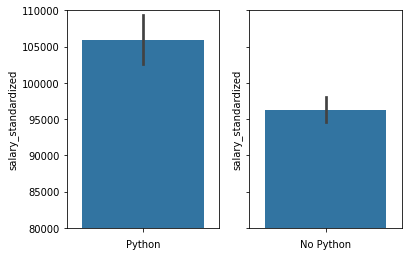

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# load end of phase data
clean_df = pd.read_csv("data/cleaned_data.csv")

# split into python & not python
df_python = clean_df[clean_df["python"] == 1]
df_nopython = clean_df[clean_df["python"] == 0]

# analyze distribution of python salaries
print("ks-test", stats.kstest(df_python["salary_standardized"], stats.norm.cdf, args=(df_python["salary_standardized"].mean(), df_python["salary_standardized"].std())))
print()

# perform t-test on python & not python salaries
print("mean of python jobs", df_python["salary_standardized"].mean())
print("mean of no python jobs", df_nopython["salary_standardized"].mean())
print()

print("t-test", stats.ttest_ind(df_python["salary_standardized"], df_nopython["salary_standardized"]))

# Create confidence intervals
fig, axes = plt.subplots(1, 2, sharey=True)

sns.barplot(data=df_python, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_nopython, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 110_000)

axes[0].set_xlabel("Python")
axes[1].set_xlabel("No Python")

## Q5

What does the kolmogorov-smirnov test tell you about the distribution of salaries?

Answer here

## Q6

What do the t-test AND confidence intervals tell you about the difference in means?

Answer here

## Q8

What would be a good null hypothesis and alternative hypothesis to this experiment?

write answer here 

For questions 9-10, use observations from the following code output:

In [20]:
from sklearn.feature_selection import f_regression
import numpy as np
import scipy.stats as stats

# remove outliers
df_python = df_python[(np.abs(stats.zscore(df_python["salary_standardized"])) < 3)]

# analyze distribution of salary
print("ks-test", stats.kstest(df_python["salary_standardized"], stats.norm.cdf, args=(df_python["salary_standardized"].mean(), df_python["salary_standardized"].std())))
print()

# create training data & testing data
train = clean_df[["sql", "python", "tableau", "r", "github", "work_from_home", "excel", "word", "azure",
                   "git", "matlab", "spss", "numpy", "power_bi", "ruby", "java", "rust", "c", "html", 
                   "mysql", "tensorflow"]]
target = clean_df["salary_standardized"]

freg=f_regression(train,target)

for i, name in enumerate(train.columns):
    print(name, end=": ")
    print(round(freg[1][i], 10))

ks-test KstestResult(statistic=0.09525599225507786, pvalue=0.0005979159520919759)

sql: 5.121e-07
python: 2.0138e-06
tableau: 0.0088538836
r: 5.93615e-05
github: 0.2099275722
work_from_home: 7.64933e-05
excel: 3.3749e-06
word: 3.48457e-05
azure: 0.0020380376
git: 0.10819979
matlab: 0.5827610725
spss: 0.0669981003
numpy: 0.2879679215
power_bi: 0.0007987545
ruby: 0.5266467297
java: 4.8605e-06
rust: 1.0
c: 0.0025264854
html: 0.8709855702
mysql: 0.3051344025
tensorflow: 0.2635445352


## Q9

What did you notice about the kolmogorov smirnov test after we removed outliers? Is it larger? Smaller?

write answer here 

## Q10

Take a look at the p-values for your linear regression coefficients. Which ones are not significant?

write answer here